In [1]:
import os
os.chdir('/home/cjtu/projects/essi21/code')
import mixing as mm
import numpy as np
import matplotlib.pyplot as plt

labels = {
    'A': 'Micrometeorites',
    'B': 'Small impactors',
    'C': 'Simple craters (equil)',
    'D': 'Simple craters (stoch)',
    'E': 'Complex craters (stoch)',
}

fmts = {
    'A': 'rx',
    'B': 'b.',
    'C': 'g+',
    'D': 'y^',
    'E': 'c--',
}
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (8, 8),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
})

time_arr = mm._TIME_ARR
regimes = ('A', 'B', 'C', 'D', 'E')
random_seed = mm.RANDOM_SEED

def get_ice_arrs(time_arr, regimes, seed):
    mm.set_seed(seed)
    ice_arrs = {r: np.zeros(len(time_arr)) for r in regimes}
    for t, age in enumerate(time_arr):
        for r in regimes:
            ice_mass = mm.total_impact_ice(age, [r])
            ice_thickness = mm.get_ice_thickness(ice_mass)
            ice_arrs[r][t] = ice_thickness
    return ice_arrs

# ice_arrs = get_ice_arrs(time_arr, regimes, random_seed)

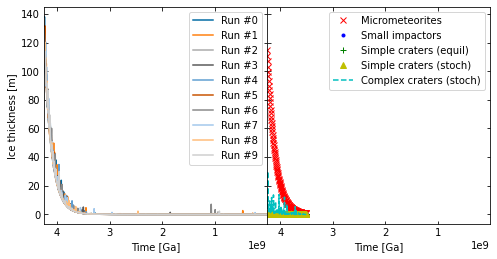

In [6]:
# Plots
f, axs = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
f.subplots_adjust(wspace=0)

for seed in range(0,10):
    impact_ice_arrs = get_ice_arrs(time_arr, regimes, seed)
    total_ice = np.zeros(len(time_arr))
    for r in regimes:
        label = labels[r]
        if seed == 0:
            idx = time_arr > 3.5e9
            axs[1].plot(time_arr[idx], impact_ice_arrs[r][idx], fmts[r], label=label)
        total_ice += impact_ice_arrs[r]
    axs[0].plot(time_arr, total_ice, '-', label=f'Run #{seed}')

for ax in axs:
    ax.set_xlim(time_arr.max()+time_arr.min(), time_arr.min())
    ax.set_xlabel('Time [Ga]')
    ax.legend()
axs[0].set_ylabel('Ice thickness [m]')
plt.savefig('/home/cjtu/projects/essi21/figs/impactor_ice.png')
plt.show()

In [17]:
sfd_slope = mm.SFD_SLOPES['E']
crater_diams = mm.get_diam_array('E')
n_craters = mm.neukum(crater_diams[0]) - mm.neukum(crater_diams[-1])
n_craters *= mm.TIMESTEP * mm.SA_MOON * mm.impact_flux(4.3e9) / mm.impact_flux(0)  # 918 craters
sfd = crater_diams ** sfd_slope
sfd_prob = sfd / np.sum(sfd)

n_craters = mm.probabalistic_round(n_craters)  # 919
crater_diams = mm._RNG.choice(crater_diams, n_craters, p=sfd_prob)


(array([574., 153.,  80.,  42.,  27.,  15.,  10.,   3.,   7.,   7.]),
 array([ 15000.,  43000.,  71000.,  99000., 127000., 155000., 183000.,
        211000., 239000., 267000., 295000.]),
 <BarContainer object of 10 artists>)

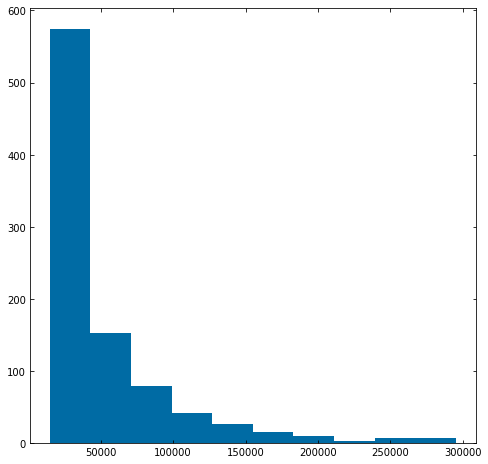

In [19]:
plt.hist(crater_diams)